# Catscatter demo
- original by Myriam Barnes in TowardsDataScience.com
- visualizes relations between category variables in scatterplot form.

In [12]:
%matplotlib inline

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def scatter_matrix(
    df,
    colx,coly,
    cols,
    color=['grey','black'],
    ratio=50,
    #font='Helvetica',
    save=False,
    save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix. default 'Helvetica'
        - save: optional. True = save image in the same path as the code. default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(
        zip(df[colx].sort_values().unique(),
            range(len(df[colx].unique()))))
    
    coly_codes=dict(
        zip(df[coly].sort_values(ascending=False).unique(),
            range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    # Prepare the aspect of the plot
    plt.rcParams['xtick.bottom']    = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top']       = plt.rcParams['xtick.labeltop'] = True
    #plt.rcParams['font.sans-serif'] =font
    plt.rcParams['xtick.color']     =color[-1]
    plt.rcParams['ytick.color']     =color[-1]
    #plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(
            num,-1,
            len(colx_codes)+1,
            linestyle='dashed',
            linewidth=1,
            color=color[num%2],alpha=0.5)
        
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,
                   len(coly_codes)+1,
                   linestyle='dashed',
                   linewidth=1,
                   color=color[num%2],
                   alpha=0.5)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(
        ticks=list(colx_codes.values()),
        labels=colx_codes.keys(),
        rotation=90)

    plt.yticks(
        ticks=list(coly_codes.values()),
        labels=coly_codes.keys())
    
    plt.xlim(
        xmin=-1,
        xmax=len(colx_codes))
    
    plt.ylim(
        ymin=-1,
        ymax=len(coly_codes))
    
    # Save if wanted
    if save:
        plt.savefig(save_name+'.png')

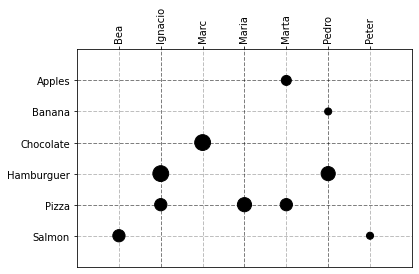

In [16]:
data=pd.DataFrame(
    {'friend':        ['Peter','Marc','Ignacio','Marta','Marta','Ignacio','Maria','Pedro','Bea','Pedro'],
     'favorite_food': ['Salmon','Chocolate','Hamburguer','Pizza','Apples','Pizza','Pizza','Hamburguer','Salmon','Banana'],
     'favorite_grade':[1,5,5,3,2,3,4,4,3,1]
    })


scatter_matrix(data,'friend','favorite_food','favorite_grade')
plt.show()